In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 150)
import os
import gc
gc.enable()
import time
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from scipy import stats
%matplotlib inline
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 10]
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
import warnings
warnings.filterwarnings('ignore')
import urllib        #for url stuff

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast


from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

import seaborn as sns #for making plots
import matplotlib.pyplot as plt # for plotting
import os  # for os commands

import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE


from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Loading BokehJS ...

/kaggle/input/jigsaw-multilingual-toxic-comment-classification/validation-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/validation.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/sample_submission.csv


In [2]:
## Common Variables for Notebook 
ROOT = '/kaggle/input/jigsaw-multilingual-toxic-comment-classification/'

## load the data 
df_train = pd.read_csv(ROOT+'jigsaw-toxic-comment-train.csv')
df_test = pd.read_csv(ROOT+'test.csv')
df_sub = pd.read_csv(ROOT+'sample_submission.csv')

# First look at the data

In [3]:
#Looking data format and types
print(df_train.info())
print(df_test.info())
print(df_sub.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223549 entries, 0 to 223548
Data columns (total 8 columns):
id               223549 non-null object
comment_text     223549 non-null object
toxic            223549 non-null int64
severe_toxic     223549 non-null int64
obscene          223549 non-null int64
threat           223549 non-null int64
insult           223549 non-null int64
identity_hate    223549 non-null int64
dtypes: int64(6), object(2)
memory usage: 13.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63812 entries, 0 to 63811
Data columns (total 3 columns):
id         63812 non-null int64
content    63812 non-null object
lang       63812 non-null object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63812 entries, 0 to 63811
Data columns (total 2 columns):
id       63812 non-null int64
toxic    63812 non-null float64
dtypes: float64(1), int64(1)
memory usage: 997.2 KB
None


In [4]:
#Some Statistics
df_train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000,223549.000000
mean,0.095657,0.008777,0.054306,0.003082,0.050566,0.009470
std,0.294121,0.093272,0.226621,0.055431,0.219110,0.096852
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#Take a look at the data
df_train.tail()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
223544,fff8f64043129fa2,":Jerome, I see you never got around to this…! ...",0,0,0,0,0,0
223545,fff9d70fe0722906,==Lucky bastard== \n http://wikimediafoundatio...,0,0,0,0,0,0
223546,fffa8a11c4378854,==shame on you all!!!== \n\n You want to speak...,0,0,0,0,0,0
223547,fffac2a094c8e0e2,MEL GIBSON IS A NAZI BITCH WHO MAKES SHITTY MO...,1,0,1,0,1,0
223548,fffb5451268fb5ba,""" \n\n == Unicorn lair discovery == \n\n Suppo...",0,0,0,0,0,0


In [6]:
#Take a look at the data
df_train.head()


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
#NO OF TRIALS IN THE DATASET
df_train.size, df_train.shape

(1788392, (223549, 8))

In [8]:
df_train.index

RangeIndex(start=0, stop=223549, step=1)

In [9]:
#What is the average toxic comment?
df_train['toxic'].mean()

0.09565688059441108

# Exploring the data:
## Let's check target distrubution
## Check for Class Imbalance

In [10]:
df_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

# Toxic	

In [11]:
df_train.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

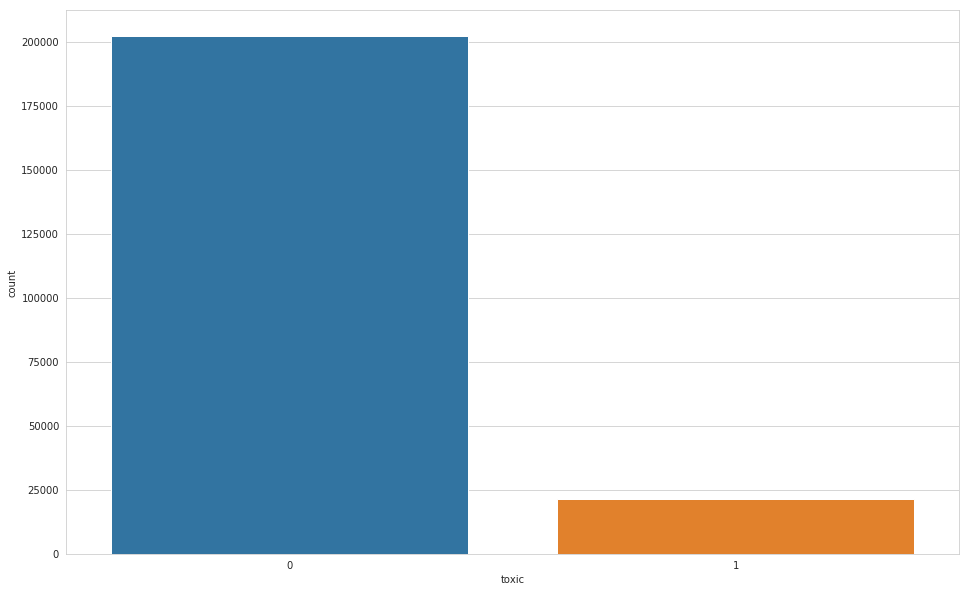

In [12]:
target = df_train['toxic']
sns.set_style('whitegrid')
sns.countplot(target)

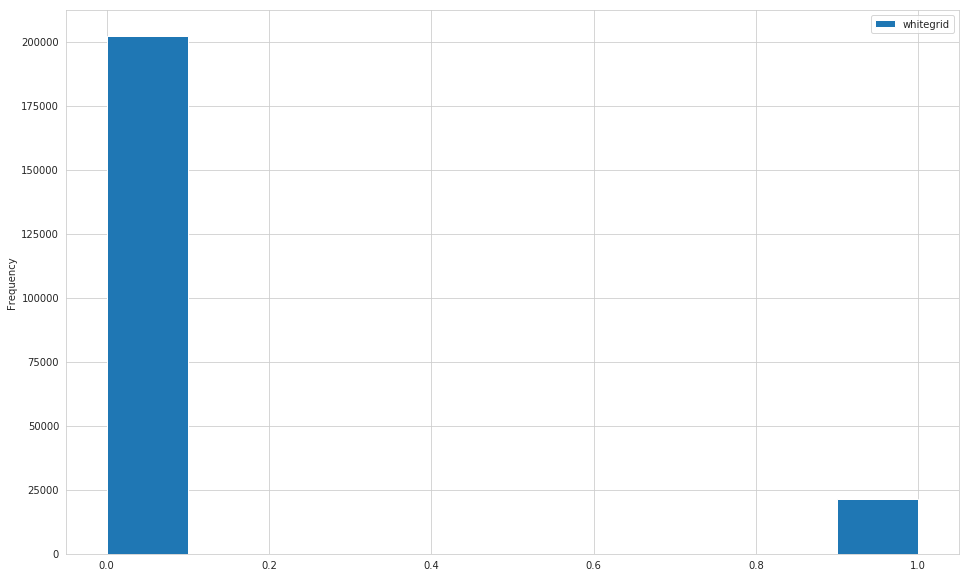

In [13]:
#Plot the distribution of toxic comment as a histogram.
df_train['toxic'].plot.hist(bins = 10, label = 'whitegrid');
plt.legend();

In [14]:
#How many comments were toxic?
df_train.groupby('toxic').size()

toxic
0    202165
1     21384
dtype: int64

# Severe toxic

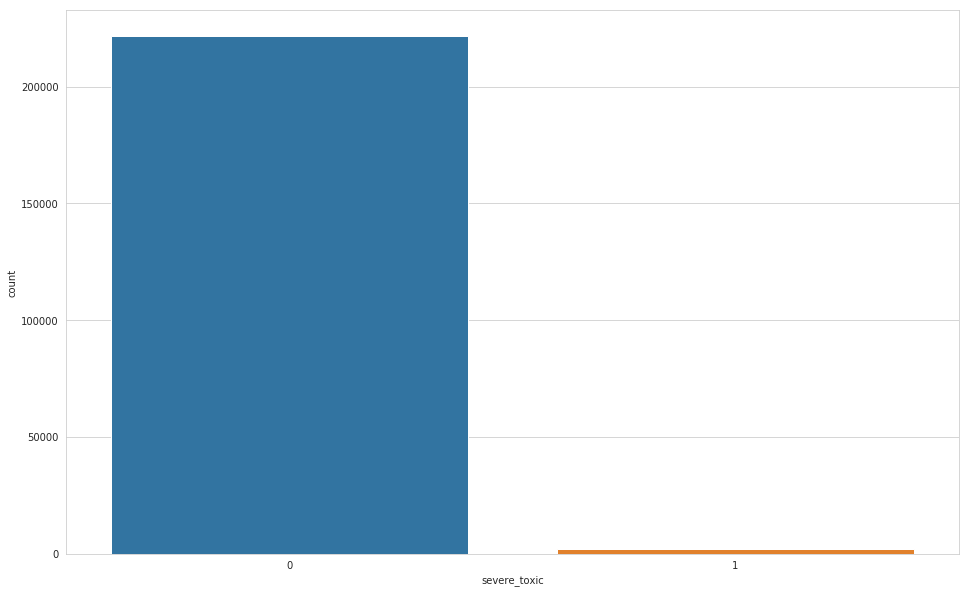

In [15]:
target = df_train['severe_toxic']
sns.set_style('whitegrid')
sns.countplot(target)

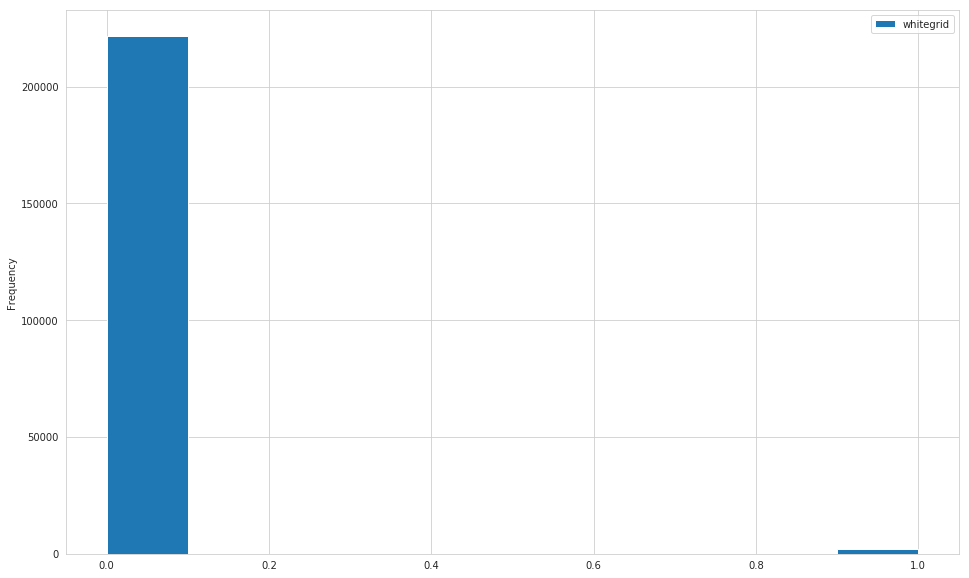

In [16]:
#Plot the distribution of severe toxic comment as a histogram.
df_train['severe_toxic'].plot.hist(bins = 10, label = 'whitegrid');
plt.legend();

In [17]:
#How many comments were severely toxic?
df_train.groupby('severe_toxic').size()

severe_toxic
0    221587
1      1962
dtype: int64

# Obscene

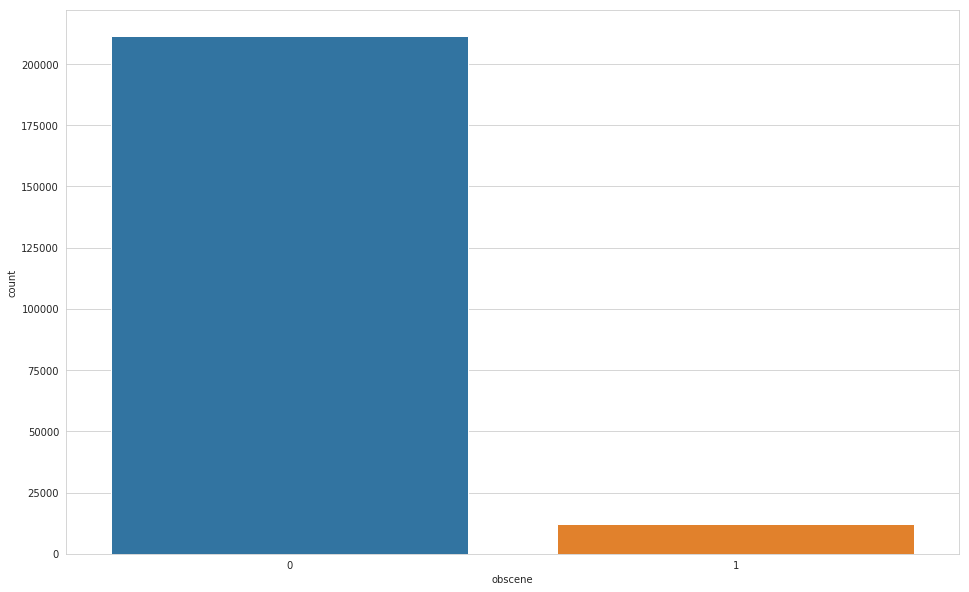

In [18]:
target = df_train['obscene']
sns.set_style('whitegrid')
sns.countplot(target)

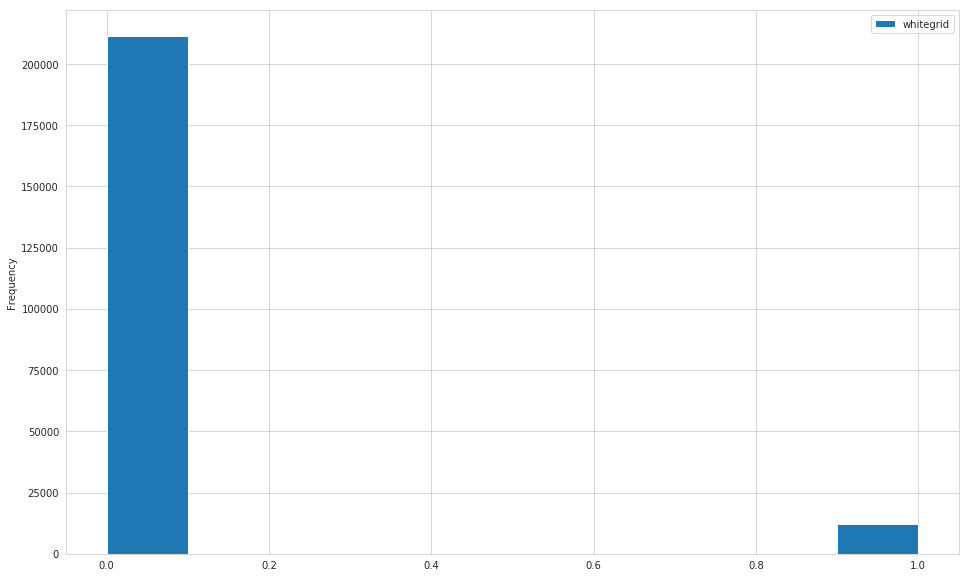

In [19]:
#Plot the distribution of Obscene commentsas a histogram.
df_train['obscene'].plot.hist(bins = 10, label = 'whitegrid');
plt.legend();

In [20]:
#How many comments were Obscene?
df_train.groupby('obscene').size()

obscene
0    211409
1     12140
dtype: int64

# Threat

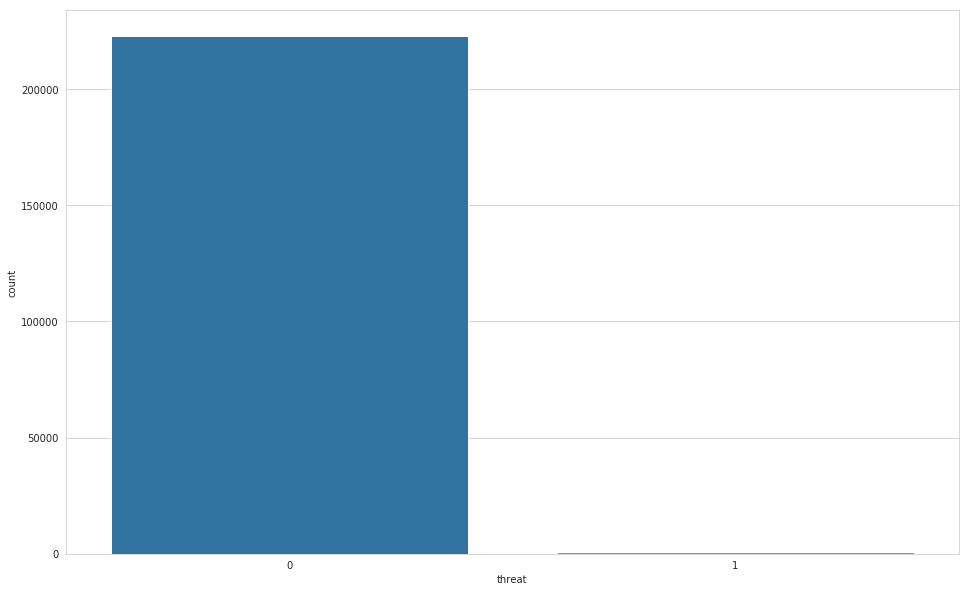

In [21]:
target = df_train['threat']
sns.set_style('whitegrid')
sns.countplot(target)

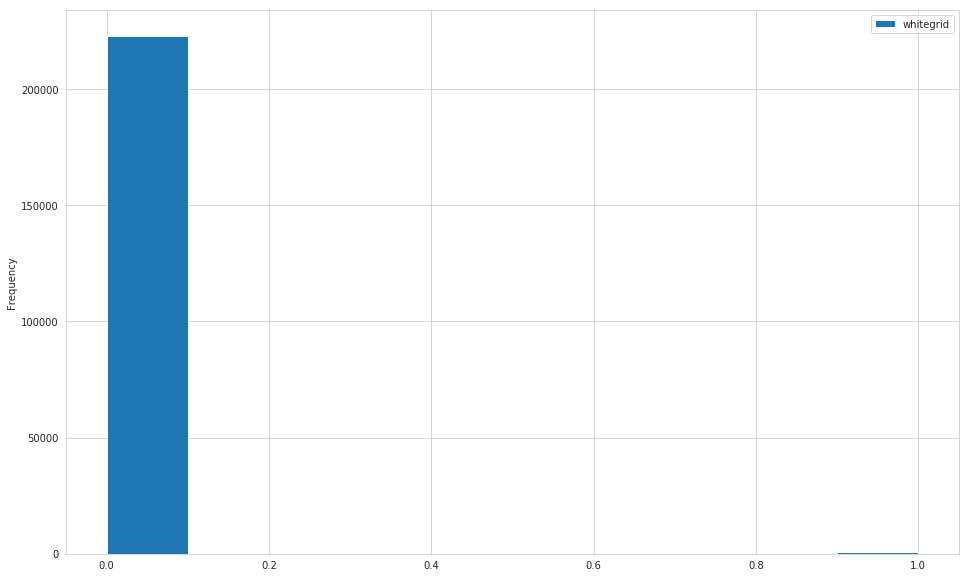

In [22]:
#Plot the distribution of Threat comments as a histogram.
df_train['threat'].plot.hist(bins = 10, label = 'whitegrid');
plt.legend();

In [23]:
#How many comments were threatening?
df_train.groupby('threat').size()

threat
0    222860
1       689
dtype: int64

# Insult

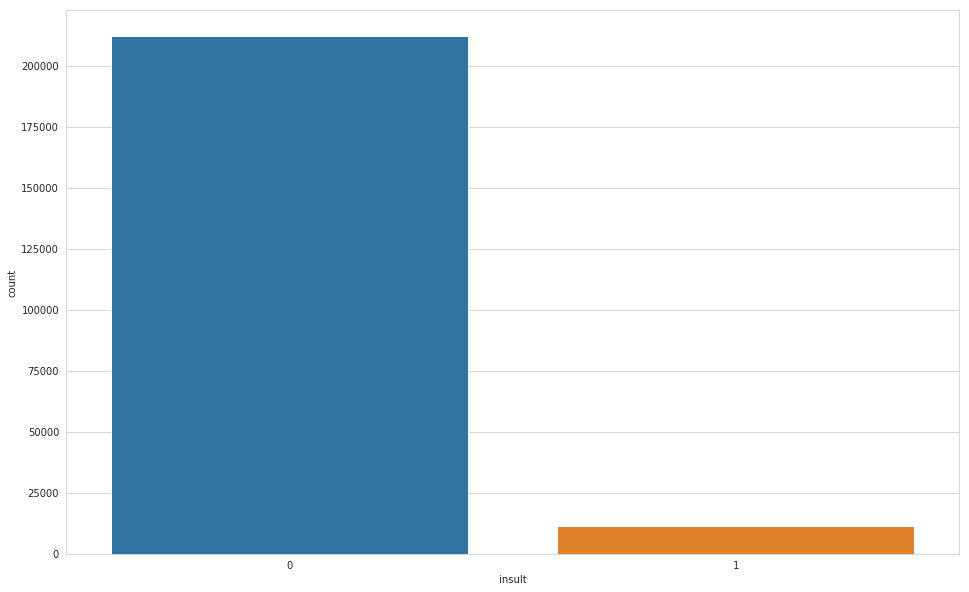

In [24]:
target = df_train['insult']
sns.set_style('whitegrid')
sns.countplot(target)

In [25]:
#How many comments were insulting?
df_train.groupby('insult').size()

insult
0    212245
1     11304
dtype: int64

# Identity hate

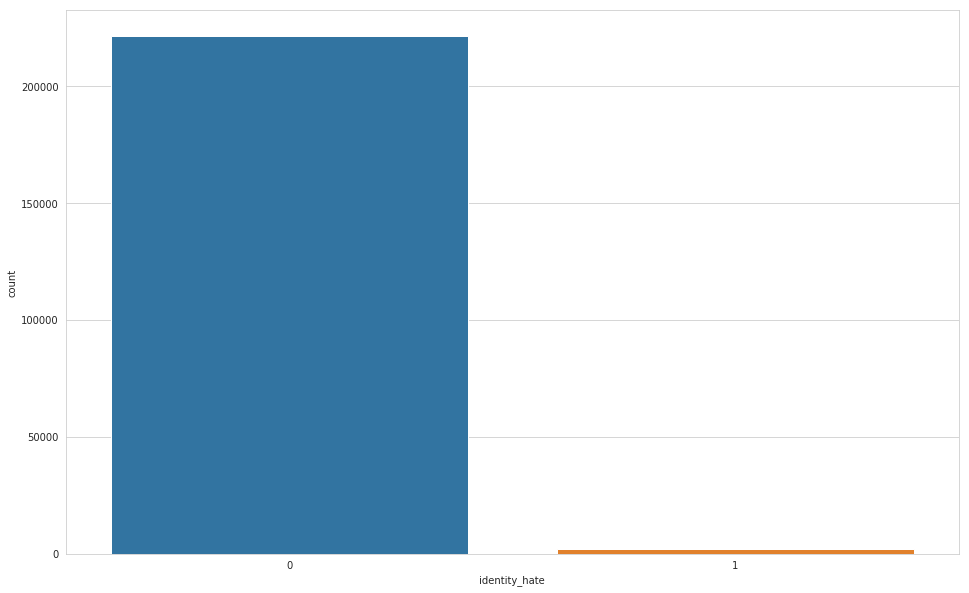

In [26]:
target = df_train['identity_hate']
sns.set_style('whitegrid')
sns.countplot(target)

In [27]:
#How many comments were reflects hate ?
df_train.groupby('identity_hate').size()

identity_hate
0    221432
1      2117
dtype: int64

# Check Text Content

In [28]:
df_train["comment_text"].head()

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: comment_text, dtype: object

In [29]:
#Checking the text comment with a list
df_train["comment_text"].tolist()[:5]

["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
 '"\nMore\nI can\'t make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of ""types of accidents""  -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on r

# Let's make it more perfect

In [30]:
t = df_train["comment_text"].to_list()
for i in range(5):
    print('-'*105)
    print('Comment '+str(i+1)+': '+t[i])
    print('-'*105)


---------------------------------------------------------------------------------------------------------
Comment 1: Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27
---------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------
Comment 2: D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
---------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------
Comment 3: Hey man, I'm really not trying to edit war. It's just that 

# Let's do some text analysis

## I want to check if there is some duplicated comments.

In [31]:
print(df_train.shape[0])
print(len(set(df_train['comment_text'])))

223549
223549


### There is not any duplicated comment for training set, what about test set?

In [32]:
df_test

,id,content,lang
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,tr
1,1,"Вполне возможно, но я пока не вижу необходимо...",ru
2,2,"Quindi tu sei uno di quelli conservativi , ...",it
3,3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,tr
4,4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,tr
...,...,...,...
63807,63807,"No, non risponderò, come preannunciato. Prefer...",it
63808,63808,"Ciao, I tecnici della Wikimedia Foundation sta...",it
63809,63809,innnazitutto ti ringrazio per i ringraziamenti...,it
63810,63810,Kaç olumlu oy gerekiyor? Şu an 7 oldu. Hayır...,tr


In [33]:
print(df_test.shape[0])
print(len(set(df_test['content'])))

63812
63812


Conclusion
Most of the comments made were toxic and relatively few were threatening.
Topic modeling would be required to understand the content of each comment.